# Pandas bevezető

Angol nyelvű erőforrások:

1. A hivatalos dokumentációhoz tartozó rövid bevezető: http://pandas.pydata.org/pandas-docs/stable/10min.html
2. Részletesebb bevezető: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
3. Brandon Rhodes előadása, Pycon 2015: https://www.youtube.com/watch?v=5JnMutdy6Fw

# Mi az a pandas?

A pandas egy adatkezelő függvénykönyvtár, amit nagymértékben megkönnyiti az adatok kezelését, az adatbányászat [adattisztítás](https://hu.wikipedia.org/wiki/Adattiszt%C3%ADt%C3%A1s) és adatintegráció lépéseit. Az adatokat táblázatos formában kezeli. A táblázatoknak van fejlécük és indexük. Heterogén adatokat tárolhatunk: szöveges, számadat, igazságérték, dátum stb. Az adatok típusa egy oszlopon belül sem kell, hogy azonos legyen.

A pandas remekül együttműködik a Python gépi tanuló könyvtárával (scikit-learn) és a legelterjedtebb vizualizációs könyvtárakkal (matplotlib, seaborn).

In [ ]:
import pandas as pd  # konvenció szerint pd aliast szoktunk használni
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [ ]:
grades = pd.DataFrame(
    {
        'subject': ['analízis 1', 'digitális technika 1', 
                    'fizika 1', 'mikmak', 'programozás alapjai 1', 'szoftvertechonológia',
                   'bevezetés a számításelméletbe 1'],
        'grade': [3, 4, 3, 2, 5, 1, 4],
        'teacher': ['a', 'b', 'a', 'c', 'd', 'd', 'd'],
        'semester': [1, 1, 2, 2, 1, 3, 1],
    }
)
grades

,subject,grade,teacher,semester
0,analízis 1,3,a,1
1,digitális technika 1,4,b,1
2,fizika 1,3,a,2
3,mikmak,2,c,2
4,programozás alapjai 1,5,d,1
5,szoftvertechonológia,1,d,3
6,bevezetés a számításelméletbe 1,4,d,1


A DataFrame elejét a .head függvénnyel, a végét a .tail-lel nézhetjük meg. Ennek akkor van jelentősége, ha nagy táblázatokkal dolgozunk.

In [ ]:
grades.head()

,subject,grade,teacher,semester
0,analízis 1,3,a,1
1,digitális technika 1,4,b,1
2,fizika 1,3,a,2
3,mikmak,2,c,2
4,programozás alapjai 1,5,d,1


Alapértelmezetten 5 sort ír ki, de megadhatjuk paraméterként pontosan hány sort szeretnénk látni.

In [ ]:
grades.tail(2)

,subject,grade,teacher,semester
5,szoftvertechonológia,1,d,3
6,bevezetés a számításelméletbe 1,4,d,1


# Egyszerű navigálás a DataFrame-ben

Fontos megemlíteni, hogy minden művelet egy új DataFrame-mel tér vissza, beleértve a `head` és a `tail` függvényeket is, azonban ezek az új DataFrame-ek nem tényleges másolatok, hanem csak ún. slice-ok az eredetiből. A `copy` függénnyel tudunk másolatot készíteni.

A táblázat első oszlopa kitüntetett, ez a DataFrame indexe, ezzel tudjuk azonosítani a sorokat. Ugyan nem követelmény, hogy unikus legyen, de praktikus unikusra választani. Egynél több oszlopot is használhatunk indexként (multiindex).

## Oszlopok kiválasztása

Lekérhetünk csak bizonyos oszlopokat, ekkor egy új DataFrame-et kapunk, ami a választott oszlopokat tartalmazza csak. Egy oszlopot a szögletes zárójelekkel tudunk indexelni.

In [ ]:
grades['teacher']

0    a
1    b
2    a
3    c
4    d
5    d
6    d
Name: teacher, dtype: object

Amennyiben az oszlop neve nem tartalmaz szóközöket, attribútumként is elérjük.

In [ ]:
grades.teacher

0    a
1    b
2    a
3    c
4    d
5    d
6    d
Name: teacher, dtype: object

A kapott eredmény nem tűnik táblázatnak és valóban más típusú

In [ ]:
type(grades.teacher)

pandas.core.series.Series

Amikor a dimenziók száma egyre csökken, `Series` objektumot kapunk vissza.

Egynél több oszlop kiválasztásánál dupla zárójelet kell használni.

In [ ]:
grades[['grade', 'teacher']]

,grade,teacher
0,3,a
1,4,b
2,3,a
3,2,c
4,5,d
5,1,d
6,4,d


Valójában az `[]` operátor indexének típusa alapján dől el, hogy milyen típust kapunk vissza.
Egy oszlopból is készíthethünk `DataFrame`-et `Series` helyett, ha listaként kérdezzük le:

In [ ]:
print(type(grades[['grade']]))
grades[['grade']]

<class 'pandas.core.frame.DataFrame'>


,grade
0,3
1,4
2,3
3,2
4,5
5,1
6,4


## Sorok kiválasztása

A sorokat többféleképpen indexelhetjük:
1. index szerint
2. sorszám szerint

Mielőtt index szerint kérdeznénk le egy sort, állítsuk át az indexet valami beszédesebbre.

In [ ]:
grades = grades.set_index('subject')
grades

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d
bevezetés a számításelméletbe 1,4,1,d


In [ ]:
grades.loc['fizika 1']  # a loc után [] kell!

grade       3
semester    2
teacher     a
Name: fizika 1, dtype: object

Mivel egyetlen sort kértünk, megint `Series` objektumot kapunk.

In [ ]:
type(grades.loc['fizika 1'])

pandas.core.series.Series

A Series egy egydimenziós adatsor, gondolhatunk rá úgy, mint a DataFrame egy sorára.

## Indexelés sor szerint

In [ ]:
grades.iloc[1:3]  # utolsó index nincs benne, [1, 3)

,grade,semester,teacher
subject,,,
digitális technika 1,4,1,b
fizika 1,3,2,a


### Oszlopok kiválasztása az `iloc` segítségével

In [ ]:
grades.iloc[:, [0, 2]]

,grade,teacher
subject,,
analízis 1,3,a
digitális technika 1,4,b
fizika 1,3,a
mikmak,2,c
programozás alapjai 1,5,d
szoftvertechonológia,1,d
bevezetés a számításelméletbe 1,4,d


In [ ]:
grades.iloc[:, 1:-1]

,semester
subject,
analízis 1,1
digitális technika 1,1
fizika 1,2
mikmak,2
programozás alapjai 1,1
szoftvertechonológia,3
bevezetés a számításelméletbe 1,1


#### Tetszőleges sor és oszlop tartományok vagy kombinációk kiválasztása

In [ ]:
grades.iloc[1:5, 1:2]

,semester
subject,
digitális technika 1,1
fizika 1,2
mikmak,2
programozás alapjai 1,1


Egy sort vagy oszlopot többször is lekérdezhetünk, ráadásul akármilyen sorrendben.

In [ ]:
grades.iloc[[4, 1, 1], [2, 1, 2]]

,teacher,semester,teacher
subject,,,
programozás alapjai 1,d,1,d
digitális technika 1,b,1,b
digitális technika 1,b,1,b


# Egyetlen mező kiválasztása

Egy mező tartalmát sokféleképpen kiválaszthatjuk, talán így a legegyszerűbb:

In [ ]:
grades.loc['fizika 1', 'grade']

3

# Szűrés

A DataFrame-ek sorain egyszerre végezhetünk műveleteket:

In [ ]:
grades.semester == 1

subject
analízis 1                          True
digitális technika 1                True
fizika 1                           False
mikmak                             False
programozás alapjai 1               True
szoftvertechonológia               False
bevezetés a számításelméletbe 1     True
Name: semester, dtype: bool

Ekkor azokra a sorokra kapunk True-t, ahol igaz a feltétel. A feltételek kombinálhatóak, a zárójelezésre figyelni kell:

In [ ]:
(grades.semester == 1) & (grades.teacher == 'a')

subject
analízis 1                          True
digitális technika 1               False
fizika 1                           False
mikmak                             False
programozás alapjai 1              False
szoftvertechonológia               False
bevezetés a számításelméletbe 1    False
dtype: bool

Az igazságértékek sorozatával pedig szűrhetjük a DataFrame-eket:

In [ ]:
grades[grades.semester==1]

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
programozás alapjai 1,5,1,d
bevezetés a számításelméletbe 1,4,1,d


In [ ]:
grades[(grades.semester == 1) & (grades.teacher == 'a')]

,grade,semester,teacher
subject,,,
analízis 1,3,1,a


# Vektoros műveletvégzés

A pandas DataFrame-jeire és Series-eire az aritmetikai operátorok túl vannak terhelve, ezért egyszerre végezhetünk az egész táblán műveleteket.

In [ ]:
grades[['grade', 'semester']] + 15

,grade,semester
subject,,
analízis 1,18,16
digitális technika 1,19,16
fizika 1,18,17
mikmak,17,17
programozás alapjai 1,20,16
szoftvertechonológia,16,18
bevezetés a számításelméletbe 1,19,16


## Az index is hasonlóan manipulálható 

In [ ]:
grades.index.str.upper()

Index(['ANALÍZIS 1', 'DIGITÁLIS TECHNIKA 1', 'FIZIKA 1', 'MIKMAK',
       'PROGRAMOZÁS ALAPJAI 1', 'SZOFTVERTECHONOLÓGIA',
       'BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1'],
      dtype='object', name='subject')

Át is állítható:

In [ ]:
grades.index = grades.index.str.upper()
grades

,grade,semester,teacher
subject,,,
ANALÍZIS 1,3,1,a
DIGITÁLIS TECHNIKA 1,4,1,b
FIZIKA 1,3,2,a
MIKMAK,2,2,c
PROGRAMOZÁS ALAPJAI 1,5,1,d
SZOFTVERTECHONOLÓGIA,1,3,d
BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1,4,1,d


Majd visszaállítható:

In [ ]:
grades.index = grades.index.str.lower()
grades

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d
bevezetés a számításelméletbe 1,4,1,d


# Több DataFrame kezelése, merge

In [ ]:
credits = pd.DataFrame(
    {
        'subject': ['analízis 1', 'fizika 1', 'programozás alapjai 2'],
        'credit': [7, 5, 5]
    }
)
credits

,credit,subject
0,7,analízis 1
1,5,fizika 1
2,5,programozás alapjai 2


## Hány kreditet érnek a tárgyak, amikre jegyet kaptunk?

In [ ]:
d = grades.merge(credits, left_index=True, right_on='subject', how='outer')

d

,grade,semester,teacher,credit,subject
0,3.0,1.0,a,7.0,analízis 1
2,4.0,1.0,b,NaN,digitális technika 1
1,3.0,2.0,a,5.0,fizika 1
2,2.0,2.0,c,NaN,mikmak
2,5.0,1.0,d,NaN,programozás alapjai 1
2,1.0,3.0,d,NaN,szoftvertechonológia
2,4.0,1.0,d,NaN,bevezetés a számításelméletbe 1
2,NaN,NaN,NaN,5.0,programozás alapjai 2


### A paraméterek magyarázata:

1. `left_index`: a baloldali DataFrame (grades ebben az esetben) indexe mentén joinoljon.
2. `right_on`: a jobboldali DataFrame (credits) subject mezője mentén joinoljon.
3. `how`: inner/outer. Egyezik az SQL-es joinnal.

### A joinolni kívánt mező kétféle lehet:

1. index: ekkor az indexként használt oszlopot próbálja a másik táblázattal joinolni. `left_index=True`-ra kell állítani.
2. nem index: egy vagy több nem indexként használt oszlop mentén próbál meg joinolni. `left_on=col1` vagy `left_on=[col1, col2]`

In [ ]:
grades.merge(credits, left_index=True, right_on='subject', how='inner')

,grade,semester,teacher,credit,subject
0,3,1,a,7,analízis 1
1,3,2,a,5,fizika 1


## Érvénytelen adatok eldobása 

Látható, hogy nem minden tárgyhoz sikerült megtalálni a kreditszámot, hiszen nem mindegyik szerepelt a credits táblában.

A pandas NaN (not a number) tölti fel a hiányzó mezőket. Szerencsére a legtöbb műveletnek megmondhatjuk, hogy hogyan bánjon a NaN-okkal. Meg is szabadulhatunk tőlük:

In [ ]:
d = d.dropna()
d

,grade,semester,teacher,credit,subject
0,3.0,1.0,a,7.0,analízis 1
1,3.0,2.0,a,5.0,fizika 1


# Szélsőérték-keresés (max, idxmax)

Sokszor vagyunk kíváncsiak arra, hogy mi egy oszlop maximuma/minimuma vagy éppen hol veszi fel ezt az értéket (argmax). A pandas tartalmaz erre beépített függvényeket.

## DataFrame-re

Mi az egyes oszlopok maximuma?

In [ ]:
print(type(grades.max()))
grades.max()

<class 'pandas.core.series.Series'>


grade       5
semester    3
teacher     d
dtype: object

A `max` függvény egy Series-zel tér vissza, ami minden oszlop maximumát tartalmazza. Sorokra is felthetjük ugyanezt a kérdést, bár erre az adatra nem sok értelme van:

In [ ]:
grades.max(axis=1)

subject
analízis 1                         3
digitális technika 1               4
fizika 1                           3
mikmak                             2
programozás alapjai 1              5
szoftvertechonológia               3
bevezetés a számításelméletbe 1    4
dtype: int64

Hol veszi fel a maximumát?

In [ ]:
# grades.idxmax()  # hibát kapunk, mert az egyik oszlop szöveges
grades[['grade', 'semester']].idxmax()

grade       programozás alapjai 1
semester     szoftvertechonológia
dtype: object

Indexelhetünk is a visszakapott értékekkel, így a legmagasabb értékeket tartalmazó sorokat kapjuk meg.

In [ ]:
grades.loc[grades[['grade', 'semester']].idxmax()]

,grade,semester,teacher
subject,,,
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d


A számadatot tartalmazó oszlopok közül megkaptuk, hogy melyik sornál veszi fel a maximális értéket. Holtverseny esetén a legelső előfordulást adja vissza.

Az `idxmax` függvény `Series`-re hasonlóan működik, csak az eredmény egyetlen skalár érték:

In [ ]:
grades.grade.idxmax()

'programozás alapjai 1'

# Csoportosítás (groupby)

A groupby függvénnyel tetszőleges oszlop mentén csoportosíthatjuk a DataFrame-et.

In [ ]:
g = credits.groupby('credit')

In [ ]:
g.groups

{5: Int64Index([1, 2], dtype='int64'), 7: Int64Index([0], dtype='int64')}

Nem csak oszlop szerint tudunk csoportosítani, hanem tetszőleges kifejezés szerint.

In [ ]:
credits.credit % 3

0    1
1    2
2    2
Name: credit, dtype: int64

Eszerint groupby:

In [ ]:
credits.groupby(credits.credit % 3)

Csoportonként végezhetünk műveleteket:

In [ ]:
grades.groupby("semester").mean()

,grade
semester,
1,4.0
2,2.5
3,1.0


Egynél több oszlop szerint is csoportosíthatunk, ekkor az olszopok értékeinek összes kombinációja (direkt szorzat) szerepelni fog az indexben.

A `size` függvénnyel az egyes csoportok elemeinek számát kérhetjük le.

In [ ]:
grades.groupby(["semester", "teacher"]).size()

semester  teacher
1         a          1
          b          1
          d          2
2         a          1
          c          1
3         d          1
dtype: int64

Ismét `Series` objektumot kaphatunk. A könnyebb olvashatóság kedvéért `DataFrame`-é konvertálhatjuk:

In [ ]:
grades.groupby(["semester", "teacher"]).size().to_frame()

0
semester teacher   
1        a        1
         b        1
         d        2
2        a        1
         c        1
3        d        1

# Rendezés

A `DataFrame`-eket többféleképpen rendezhetjük.

Index szerint rendezve:

In [ ]:
grades.sort_index()

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
bevezetés a számításelméletbe 1,4,1,d
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d


Illetve egy vagy több oszlop szerint rendezve:

In [ ]:
grades.sort_values(['grade', 'semester'])

,grade,semester,teacher
subject,,,
szoftvertechonológia,1,3,d
mikmak,2,2,c
analízis 1,3,1,a
fizika 1,3,2,a
digitális technika 1,4,1,b
bevezetés a számításelméletbe 1,4,1,d
programozás alapjai 1,5,1,d


Fordított sorrendben:

In [ ]:
grades.sort_index(ascending=False)

,grade,semester,teacher
subject,,,
szoftvertechonológia,1,3,d
programozás alapjai 1,5,1,d
mikmak,2,2,c
fizika 1,3,2,a
digitális technika 1,4,1,b
bevezetés a számításelméletbe 1,4,1,d
analízis 1,3,1,a


# Vizualizáció (plot)

A matplotlib modullal együttműködve rengeteg vizualizációs lehetőségünk van.

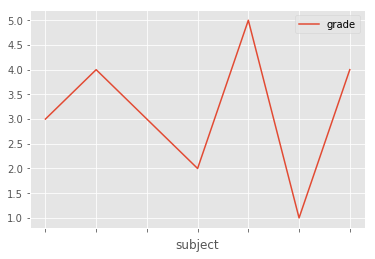

In [ ]:
grades.plot(y='grade')

Az oszlopdiagramnak több értelme lenne:

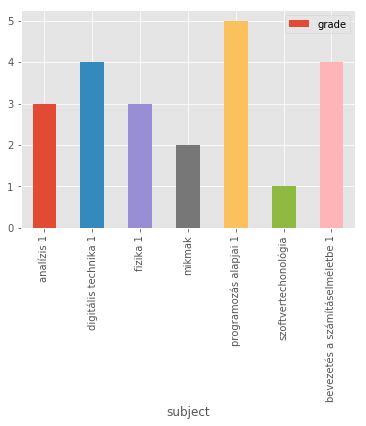

In [ ]:
grades.plot(y='grade', kind='bar')

Nem adtuk meg az x tengelyt, ekkor automatikusan a DataFrame indexét használja, ami ebben az esetben a tárgyakat jelenti.

Ábrázolhatnánk félév szerint is egy scatter ploton.

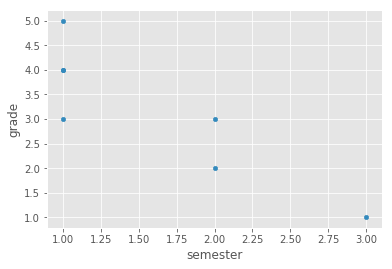

In [ ]:
grades.plot(x='semester', y='grade', kind='scatter')

## Amire érdemes figyelni (GOTCHAs)

### Minden művelet új DataFrame-et ad vissza

Szinte minden művelet alapértelmezetten egy új DataFrame-mel tér vissza, nem módosítja a paramétereit. Ezt el kell tárolnunk, ha használni akarjuk.

### Egy cellában az utolsó kifejezés visszatérési értéke kiíródik, de a többi nem

Ha a többit is szeretnénk kiírni, használjuk a print függvényt.

#Feladatok (MovieLens)

In [3]:
import pandas as pd  # konvenció szerint pd aliast használunk
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

A MovieLens adatsorral fogunk dolgozni, de először le kell töltenünk. http://grouplens.org/datasets/movielens/

Csak akkor töltjük le a fájlt, ha még nem létezik.

In [5]:
import os

data_dir = os.getenv("MOVIELENS")
if data_dir is None:
    data_dir = ""

ml_path = os.path.join(data_dir, "ml.zip")

if not os.path.exists(ml_path):
    print("Download data")
    import urllib.request
    u = urllib.request.URLopener()
    u.retrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", ml_path)
    print("Data downloaded")

Download data
Data downloaded


Kicsomagoljuk a zip fájlt:

In [6]:
unzip_path = os.path.join(data_dir, "ml-100k")

if not os.path.exists(unzip_path):
    print("Extracting data")
    from zipfile import ZipFile
    with ZipFile(ml_path) as myzip:
        myzip.extractall(data_dir)
    print("Data extraction done")
        
data_dir = unzip_path

Extracting data
Data extraction done


## Adat betöltése és normalizálása

A `pd.read_table` függvény táblázatos adatok betöltésére alkalmas. Több tucat paraméterrel [rendelkezik](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html), de csak egy kötelező paramétere van: a fájl, amit beolvasunk.
A karakterkódolást is meg kell adnunk, mert a fájl nem az alapértelmezett (utf-8) kódolást használja, hanem az ISO-8859-1-et, vagy köznéven a latin1-et.

In [7]:
# df = pd.read_table("ml-100k/u.item")  # UnicodeDecodeErrort kapunk, mert rossz dekódert használ
df = pd.read_table(os.path.join(data_dir, "u.item"), encoding="latin1")
df.head()

,1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
0,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...
1,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...
2,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...
3,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...
4,6|Shanghai Triad (Yao a yao yao dao waipo qiao...


Ez még elég rosszul néz ki. Hogyan tudnánk javítani?
1. Rossz szeparátort használt a függvény (tab az alapértelmezett). A fájlban | a szeparátor. Ezt a `sep` paraméterrel tudjuk megadni.
1. A fájl első sora került az oszlopnevek helyére. Az oszlopok valódi nevei a README fájlból derülnek ki, amit kézzel megadhatjuk a read_table-nek a `names` paraméterben.
1. A read_table automatikusan generált egy id-t minden sornak, azonban az adatfájlban a filmek már rendelkeznek egy egyedi azonosítóval (movie_id), használjuk ezt a DataFrame indexeként (`index_col` paraméter). Célszerű szóköz nélküli, kisbetűs oszlopneveket használni, mert akkor attribútumként is elérjük őket (`df.release_date`).

In [8]:
column_names = [
    "movie_id", "title", "release_date", "video_release_date", "imdb_url", "unknown", "action", "adventure", "animation",
    "children", "comedy", "crime", "documentary", "drama", "fantasy", "film_noir", "horror", "musical", "mystery",
    "romance", "sci_fi", "thriller", "war", "western"]

In [9]:
df = pd.read_table(
    os.path.join(data_dir, "u.item"), sep="|",
    names=column_names, encoding="latin1", index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Két oszlop is van, amik dátumot jelölnek: `release_date, video_release_date`. A pandas parszolni tudja a dátumokat többféle népszerű formátumban, ehhez csak a `parse_dates` paraméterben kell megadnunk a dátumot tartalmazó oszlopokat. Figyeljük meg, hogy ahol nincs dátum, az Nan (not a number)-ről NaT-ra (not a time) változik.

In [10]:
df = pd.read_table(os.path.join(data_dir, "u.item"), sep="|",
                   names=column_names, encoding="latin1",
                   parse_dates=[2,3], index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Még mindig nem tökéletes, hiszen a filmek címei után szerepel az évszám zárójelben, ami egyrészt redundáns, másrészt zaj. Tüntessük el!

A szokásos `str` műveletek egy része elérhető DataSeries objektumokra is (minden elemre végrehajtja). A függvényeket az `str` névtérben találjuk.

In [11]:
df.title.str

Egy reguláris kifejezéssel eltüntetjük a két zárójel közti részt, majd eltávolítjuk az ott maradt whitespace-eket (a strip függvény a stringek elejéről és végéről is eltávolítja).
Végül adjuk értékül a régi title oszlopnak a kezdő és záró whitespace-ektől megfosztott változatát.

In [13]:
df.title = df.title.str.replace(r'\(.*\)', '').str.strip()

In [14]:
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


A `video_release_date` mező az első néhány sorban csak érvénytelen mezőket tartalmaz. Vajon igaz ez az egész DataFrame-re? Listázzuk ki azokat a mezőket, ahol nem NaT a video_release_date értéke, vagyis érvénytelen dátum.

In [15]:
df[df.video_release_date.notnull()]

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,,,


Nincs ilyen mező, ezért elhagyhatjuk az oszlopot.

In [16]:
df = df.drop('video_release_date', axis=1)
df.head()

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat,1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Van egy `unknown` oszlop, ettől is szabaduljunk meg!

In [17]:
df = df.drop('unknown', axis=1)

## Adatok felszínes vizsgálata

Nézzük meg, hogy milyen információkat tudhatunk könnyedén meg a DataFrame-ről.

A `describe` függvény oszloponként szolgáltat alapvető infomációkkal: darabszám, átlag, szórás stb.
Mivel a legtöbb mező bináris, most nem tudunk meg sok hasznos információt a mezőkről.

In [18]:
df.describe()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Átlag, szórás, variancia stb.

Egyenként is lekérdezhetőek:

1. `count()`
1. átlag: `mean()`
1. szórás: `std()`
1. variancia: `var()`
1. 50% kvantilis: `quantile(.5)`
1. `min`, `max`

In [19]:
df.quantile(.9).head()

action       1.0
adventure    0.0
animation    0.0
children     0.0
comedy       1.0
Name: 0.9, dtype: float64

# Egyszerű lekérdezések 

## Melyik filmek jelentek meg 1956-ban? 

In [44]:
df[df.release_date.dt.year == 1956]

,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
434,Forbidden Planet,1956-01-01,http://us.imdb.com/M/title-exact?Forbidden%20P...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
495,Around the World in 80 Days,1956-01-01,http://us.imdb.com/M/title-exact?Around%20the%...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
614,Giant,1956-01-01,http://us.imdb.com/M/title-exact?Giant%20(1956),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1577,Death in the Garden,1956-01-01,"http://us.imdb.com/Title?Mort+en+ce+jardin,+La...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Melyik filmek jelentek meg a 80-as években?

In [45]:
d = df[(df.release_date.dt.year >=  1980) & (df.release_date.dt.year < 1990)]
len(d)

107

107 film jelent meg a 80-as években, ezt már nem praktikus kiíni. Nézzük meg csak az első 3-at.

In [46]:
d.head(3)

,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
89,Blade Runner,1982-01-01,http://us.imdb.com/M/title-exact?Blade%20Runne...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
101,Heavy Metal,1981-03-08,http://us.imdb.com/M/title-exact?Heavy%20Metal...,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
144,Die Hard,1988-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### A megjelenítési év legyen külön oszlop

Többször fogjuk még használni a megjelenési évet, ezért praktikus külön év oszlopot létrehozni.

A DateTime mezőhöz használható metódusok és attribútumok a dt névtérben vannak, így tudjuk minden oszlopra egyszerre meghívni. Az eredményt egy új oszlopban tároljuk.

In [47]:
df['year'] = df.release_date.dt.year

## Mikor jelentek meg a Die Hard filmek? 

In [48]:
df[df.title == 'Die Hard']

,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,,
144,Die Hard,1988-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1988.0


Sajnos csak teljes egyezésre tudunk így szűrni.

A szöveges mezőkre a pandas nyújt egy csomó műveletet, amik az str névtérben vannak (ahogy a dátum mezőkre a dt-ben voltak).

In [49]:
df[df.title.str.contains('Die Hard')]

,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,,
144,Die Hard,1988-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1988.0
226,Die Hard 2,1990-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1990.0
550,Die Hard: With a Vengeance,1995-01-01,http://us.imdb.com/M/title-exact?Die%20Hard:%2...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0


A Die Hard 4 és 5 hiányzik. Kilógnának az adatsorból? Nézzük meg még egyszer, hogy mikori filmek szerepelnek.

In [50]:
df.release_date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1681
unique                    240
top       1995-01-01 00:00:00
freq                      215
first     1922-01-01 00:00:00
last      1998-10-23 00:00:00
Name: release_date, dtype: object

A Die Hard 4 és 5 2007-ben, illetve 2013-ban jelentek meg, ezért nem szerepelnek az adatban.

### Melyik filmek tartoznak egyszerre az akció és romantikus kategóriába?

In [51]:
d = df[(df.action==1) & (df.romance==1)]
print(len(d))
d.head()

25


,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,,
33,Desperado,1995-01-01,http://us.imdb.com/M/title-exact?Desperado%20(...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1995.0
50,Star Wars,1977-01-01,http://us.imdb.com/M/title-exact?Star%20Wars%2...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1977.0
68,"Crow, The",1994-01-01,"http://us.imdb.com/M/title-exact?Crow,%20The%2...",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1994.0
92,True Romance,1993-01-01,http://us.imdb.com/M/title-exact?True%20Romanc...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1993.0
161,Top Gun,1986-01-01,http://us.imdb.com/M/title-exact?Top%20Gun%20(...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1986.0


### Melyik filmek tartoznak az akció VAGY a romantikus kategóriába?

Itt a Boole vagyra gondolunk.

In [52]:
d = df[(df.action==1) | (df.romance==1)]
print(len(d))
d.head()

473


,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,,
2,GoldenEye,1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
4,Get Shorty,1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
14,"Postino, Il",1994-01-01,"http://us.imdb.com/M/title-exact?Postino,%20Il...",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1994.0
16,French Twist,1995-01-01,http://us.imdb.com/M/title-exact?Gazon%20maudi...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995.0
17,From Dusk Till Dawn,1996-02-05,http://us.imdb.com/M/title-exact?From%20Dusk%2...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1996.0


# 1. feladat: egyszerű lekérdezések

## Q1.1. Hány akciófilm jelent meg 1985 előtt, illetve 1985-ben vagy később?

In [20]:
def count_movies_before_1985(df):
    d=df[(df.release_date.dt.year < 1985) & (df.action==1)]
    return len(d)

def count_movies_after_1984(df):
    d=df[(df.release_date.dt.year > 1984) & (df.action==1)]
    return len(d)


In [21]:
before = count_movies_before_1985(df)
print(before)
assert type(before) == int

after = count_movies_after_1984(df)
print(after)
assert type(after) == int

26
225


## Q1.2. Létezik-e gyerekeknek szóló thriller? Keress egy példát rá és térj vissza a film címével.

In [22]:
def child_thriller(df):
    d=df[(df.children==1) & (df.thriller==1)]
    title=d.iloc[0]['title']
    return (title)

In [27]:
title = child_thriller(df)
assert type(title) == str
print(title)

Transformers: The Movie, The


## Q1.3. Hány filmnek hosszabb a címe, mint 30 karakter?

In [63]:
def long_titles(df):
    
    return len(d)

In [64]:
title_cnt = long_titles(df)
assert type(title_cnt) == int

KeyError: ignored

## Q1.4. Mi a legrégebbi és a legújabb film címe?

A megjelenésnek nem csak éve van!

In [65]:
def oldest_movie(df):
    # YOUR CODE HERE
    raise NotImplementedError()

def newest_movie(df):
    # YOUR CODE HERE
    raise NotImplementedError()

In [66]:
oldest = oldest_movie(df)
newest = newest_movie(df)

assert type(oldest) == str
assert type(newest) == str

NotImplementedError: ignored

## Q1.5. Melyik a legújabb sci-fi?

In [ ]:
def newest_scifi(df):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
newest = newest_scifi(df)
assert type(newest) == str

# Csoportosítás és vizualizáció

## Hány filmet adtak ki évente?

A kérdést két lépésben tudjuk megválaszolni:

1. csoportosítás évenként
2. összesítés 1-1 évre


In [ ]:
df.groupby('year').size().plot()

Vonaldiagram az alapértelmezett, de oszlopdiagramként informatívabb lenne.

In [ ]:
df.groupby('year').size().plot(kind='bar')

Lásztik, hogy a 80-as évek végén nőtt meg a kiadott filmek száma, kicsit közelítsünk rá. Ehhez először szűrni fogjuk a 1985 utáni filmeket, majd csoportosítva ábrázolni.

In [ ]:
d = df[df.year > 1985]
d.groupby('year').size().plot(kind='bar')
# df[df.year > 1985].groupby('year').size().plot(kind='bar')  # vagy egy sorban

## Groupby tetszőleges feltétel szerint

Nem csak egy kategóriaértékű oszlop szerint csoportosíthatunk, hanem tetszőleges kifejezés szerint. Ezt kihasználva fogunk évtizedenként csoportosítani. A groupby-nak bármilyen kifejezést megadhatunk, ami diszkrét értékekre képezi le a sorokat, tehát véges sok csoport egyikébe helyezi (mint egy hash függvény).

Az évtizedet úgy kaphatjuk meg, ha az évet 10-zel osztjuk és csak az egészrészt tartjuk meg, hiszen 1983/10 és 1984/10 egészrésze ugyanúgy 198. Használjuk a Python egészosztás operátorát (//).

In [ ]:
d = df.groupby(df.year // 10 * 10)
d.groups.keys()  # létrejött csoportok listázása

In [ ]:
d.size().plot(kind='bar')

# 2. feladat: csoportosítás és vizualizáció

## Q2.1. Csoportosítsd vígjátékokat (comedy) évenként. Ábrázold oszlopdiagramon hány vígjátékot adtak ki évente.

In [71]:
def comedy_by_year(df):
    d=df[df.comedy==1]
    gb=d.groupby('year')
    return(gb)

In [72]:
c = comedy_by_year(df)
assert type(c) == pd.core.groupby.DataFrameGroupBy

### Ábrázold.

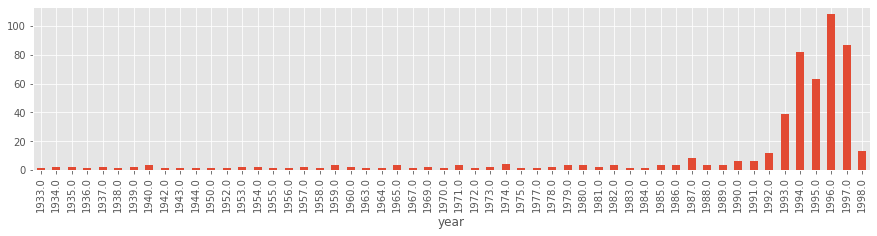

In [73]:
# YOUR CODE HERE
c.size().plot(kind='bar')

## Gyerekfilmet vagy krimit adnak ki többet évtizedenként?

In [ ]:
col1 = 'children'
col2 = 'crime'
d = df[['year', col1, col2]].copy()
d['diff'] = d[col1] - d[col2]
d.groupby(d.year // 10 * 10).sum()

In [ ]:
d.groupby(d.year // 10 * 10).sum().plot(y='diff', kind='bar')

A 90-es években több filmet adtak ki, mint előtte összesen, nézzük meg azt az évtizedet közelebbről!

## Q2.2. Mennyivel adtak ki több gyerekfilmet, mint krimit *évente* a 90-es években? Ábrázold.

Először a szűrt groupby-t készítsd el az imént létrhozott `d` `DataFrame`-ből.

In [78]:
def groupby_nineties(d):
    d=d[(d.year>1989) & (d.year<2000)]
    gb=d.groupby(d.year)
    return (gb)

In [79]:
nineties = groupby_nineties(d)
assert type(nineties) == pd.core.groupby.DataFrameGroupBy

# a diff oszlop szerepel
assert 'diff' in nineties.sum()

AssertionError: ignored

### Ábrázold.

In [81]:
nineties.sum().plot(y='diff',kind='bar')

KeyError: ignored

## Q2.3. Ábrázold a kiadási napok (hónap napjai) eloszlását egy tortadiagramon!

Tortadiagramot a `plot` függvény `kind="pie"` argumentumával tudsz készíteni.

A tortadiagramhoz érdemes megváltoztatni a diagram képarányát, amit a plot függvény `figsize` paraméterének megadásával tehetsz meg. `figsize=(10,10)`. Százalékokat a `autopct="%.0lf%%"` opcióval lehet a diagramra írni.

A tortadiagramot szebbé teheted másik colormap választásával: [dokumentáció](http://pandas.pydata.org/pandas-docs/stable/visualization.html#colormaps) és a [colormapek listája](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps).

In [82]:
def groupby_release_day(df):
    d=df[['release_date']].copy()
    d['month']=d['release_date'].dt.month
    d['value']=1
    gb=d.groupby(d['month'])
    return (gb)

In [83]:
by_day = groupby_release_day(df)
assert type(by_day) == pd.core.groupby.DataFrameGroupBy

# legfeljebb 31 napos egy hónap
assert len(by_day) < 32

# nehogy a hét napjai szerint csoportosítsunk
assert len(by_day) > 7

### Ábrázold.

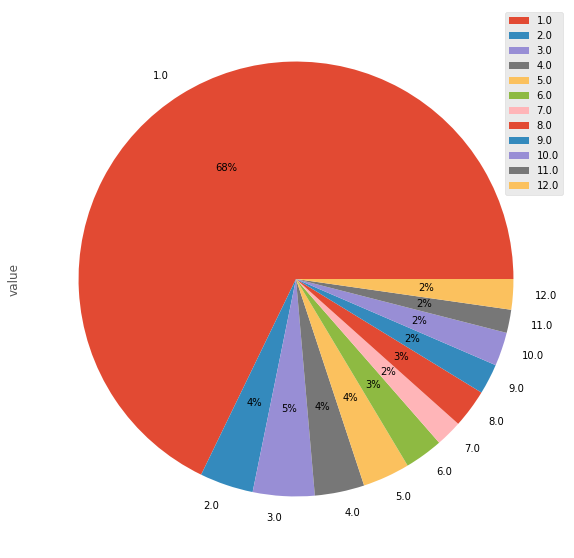

In [86]:
by_day.sum().plot(y='value', figsize=(10,10),kind='pie',autopct="%.0lf%%")

## Q2.4. Hagyományos lexikont szeretnénk készíteni a filmekből. Melyik kezdőbetű hányszor fordul elő a filmek címében? Ábrázold tortadiagramon.

### Csoportosítsd a filmeket kezdőbetű szerint.

In [87]:
def groupby_initial_letter(df):
    d=df[['title']].copy()
    d['start_letter']=d['title'].str[:1]
    d['value']=1
    gb=d.groupby(d['start_letter'])
    return (gb)

In [88]:
initial = groupby_initial_letter(df)

assert type(initial) == pd.core.groupby.DataFrameGroupBy

### Ábrázold.

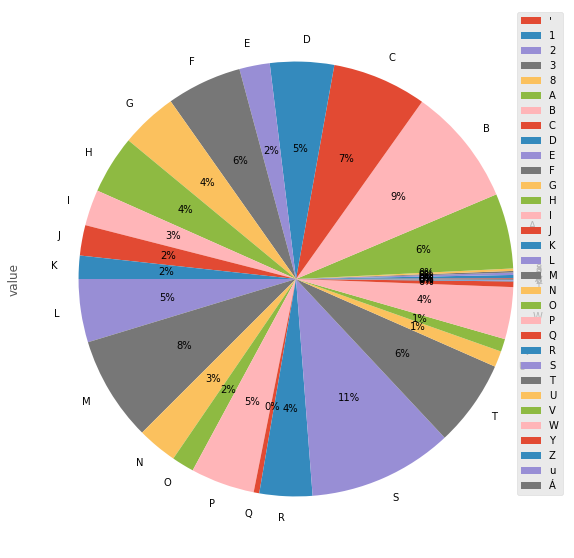

In [89]:
initial.sum().plot(y='value', figsize=(10,10),kind='pie',autopct="%.0lf%%")

## \*Q2.5. Írj függvényt, ami több oszlop mentén csoportosít és visszaadja a legnagyobb csoportot.

Tipp: a `GroupBy` objektum `get_group` függvénye visszaad egy csoportot.

In [97]:
def get_largest_group(df, groupby_columns):
    d=df.groupby(groupby_columns)
    max=0
    temp=0
    if len(groupby_columns) == 1:
      for i in range (len(d)):
        gb=d.get_group(i)
        if (max<len(gb)):
          max=len(gb)
          temp=gb
      return (temp)
    for i in groupby_columns:
      j=0
      for k in groupby_columns:
        l=0
        gb=d.get_group((j,l))
        if max < len(gb):
          max=len(gb)
          temp=gb
        l+=1
      j+=1
    return(gb)

In [98]:
genres = ["drama"]
drama_largest = get_largest_group(df, genres)

assert type(drama_largest) == pd.DataFrame
assert len(drama_largest) == 957

genres = ["drama", "comedy"]
both_largest = get_largest_group(df, genres)

# a csoportban minden film comedy es drama cimkeje azonos
assert both_largest[["comedy", "drama"]].nunique().loc["comedy"] == 1
assert both_largest[["comedy", "drama"]].nunique().loc["drama"] == 1
print(both_largest.shape)

(541, 22)


# Több DataFrame kezelése, pd.merge

Az adathalmaz lényegi része a 100000 értékelés, amit az u.data fájlból tudunk beolvasni. A README-ből kiolvashatjuk a fájl oszlopait.

In [103]:
cols = ['user', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join(data_dir, "u.data"), names=cols)

In [104]:
ratings.head()

,user,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


A timestamp oszlop Unix timestampeket tartalmaz, konvertáljuk DateTime-má.

In [105]:
ratings['timestamp'] = pd.to_datetime(ratings.timestamp, unit='s')
ratings.head()

,user,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


## Merge a film táblával

Mivel már több DataFrame-mel dolgozunk, érdemes a filmeket tartalmazó táblának beszédesebb nevet adni.

In [106]:
movies = df

Felülírjuk a ratings táblát:

In [107]:
ratings = pd.merge(ratings, movies, left_on='movie_id', right_index=True)
ratings.head()

,user,movie_id,rating,timestamp,title,release_date,imdb_url,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
0,196,242,3,1997-12-04 15:55:49,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
253,63,242,3,1997-10-01 23:06:30,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
629,226,242,5,1998-01-04 04:37:51,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
1232,154,242,3,1997-11-10 05:03:55,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
2159,306,242,5,1997-10-10 17:16:33,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0


## Hány értékelés érkezett a film megjelenése előtt?

In [108]:
len(ratings[ratings.timestamp <= ratings.release_date])

231

## Hogy oszlik meg ez a szám a filmek között? 

In [109]:
ratings[ratings.timestamp <= ratings.release_date].title.value_counts()

Apt Pupil                          160
Desperate Measures                  21
Fallen                               4
Dangerous Beauty                     4
Phantoms                             4
Hard Rain                            4
Magic Hour, The                      3
Leading Man, The                     3
Prophecy II, The                     3
Four Days in September               3
Firestorm                            3
Mighty, The                          3
Wag the Dog                          2
Duoluo tianshi                       2
Hurricane Streets                    2
Half Baked                           2
Shooting Fish                        2
Sliding Doors                        1
Truman Show, The                     1
Deep Rising                          1
I Know What You Did Last Summer      1
Oscar & Lucinda                      1
Star Kid                             1
Name: title, dtype: int64

# 3. feladat: merge

## Q3.1. Hány film kapott legalább egyszer 4 fölötti értékelést?

VIGYÁZAT! A filmek címe nem feltétlenül egyedi.

In [99]:
def count_greater_than_4(ratings):
    d=ratings[['movie_id','rating']].copy()
    d=d[d.rating>4]
    gb= d.groupby(d.movie_id)
    temp= len(gb.sum())
    return temp

In [110]:
greater = count_greater_than_4(ratings)

assert type(greater) == int
assert greater != 1160  # titles are NOT UNIQUE

## Hisztogram készítése az egyes értékelésekről

Hisztogram készítésére (melyik érték hányszor szerepelt), a hist függvény áll rendelkezésünkre:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fb39d63d0>]],
      dtype=object)

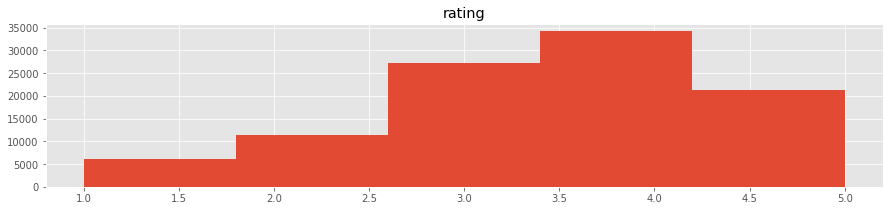

In [111]:
ratings.hist('rating', bins=5)

## Q3.2. Ábrázold hisztogramon az 1960 előtti krimik értékeléseit!

In [117]:
def filter_old_crime_movies(ratings):
    d=ratings[['year','rating']]
    temp=d[d.year<1960]
    return (temp)

In [118]:
old_crime_movies = filter_old_crime_movies(ratings)

assert type(old_crime_movies) == pd.DataFrame

### Ábrázold.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fb36a20d0>]],
      dtype=object)

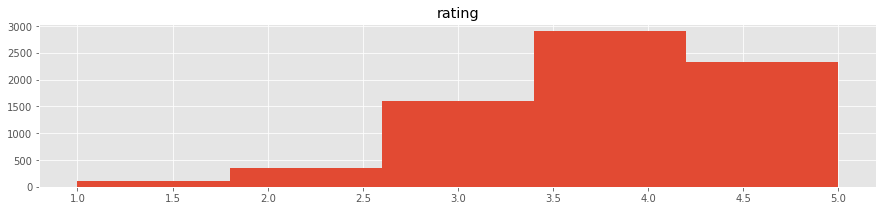

In [120]:
old_crime_movies.hist('rating',bins=5)

## Q3.3. Mi az értékelések átlaga évtizedenként (film megjelenési éve)? 

Figyelj arra, hogy csak annyi adat szerepeljen az összesítésben, amennyit a feladat kér. Az indexek legyenek az évtizedek kezdőévei.

In [121]:
def rating_mean_by_decade(ratings):
    d=ratings[['year','rating']].copy()
    d['sor']=1
    gb=d.groupby(d.year//10*10).sum()
    gb['atlag']=gb.rating/gb.sor
    temp=pd.Series(gb.atlag)
    return (temp)

In [122]:
decade_mean = rating_mean_by_decade(ratings)

# csak az ertekeles oszlop atalga erdekel minket, nem az egesz DataFrame-e
assert not type(decade_mean) == pd.DataFrame
assert type(decade_mean) == pd.Series
assert 1920 in decade_mean.index
assert 1921 not in decade_mean.index

## Q3.4. Az értékelésekhez tartozik egy timestamp. Mi az értékelések átlaga a hét napjaira  lebontva?

Tehát melyik napon jószívűbbek az emberek?

Tipp: érdemes körbenézni a dátummezőkhöz tartozó `dt` névtérben.

In [127]:
def rating_mean_by_weekday(ratings):
    d=ratings[['timestamp','rating']].copy()
    d['sor']=1
    d['nap']=d['timestamp'].dt.day_name()
    gb=d.groupby('nap').sum()
    gb['atlag']=gb.rating/gb.sor
    temp=pd.Series(gb.atlag)
    return (temp)

In [124]:
weekday_mean = rating_mean_by_weekday(ratings)

assert type(weekday_mean) == pd.Series
assert type(weekday_mean) != pd.DataFrame  # csak egy oszlop kell

## Q3.5. Melyik hónapban mennyi a kalandfilmek (adventure) értékeléseinek szórása? 

Vigyázat, a szórás és a variancia nem azonos!

In [130]:
def adventure_monthly_std(ratings):
    d= ratings[ratings.adventure==1]
    d=ratings[['timestamp','rating']].copy()
    d['honap']=d['timestamp'].dt.month
    d['szoras']=d.std(axis=1)
    gb=d.groupby('honap').sum()
    temp=pd.Series(gb.szoras)
    return (temp)

In [131]:
adventure = adventure_monthly_std(ratings)
assert type(adventure) == pd.Series
assert type(adventure) != pd.DataFrame

# legfeljebb 12 különböző hónapban érkezhettek értékelések
assert len(adventure) <= 12

# 4. feladat: Users DataFrame

## Q4.1 Olvasd be a u.user fájlt egy `users` nevű DataFrame-be!

Segítségképpen az oszlopok: `user_id, age, gender, occupation, zip`. A `user_id` oszlop legyen a `DataFrame` indexe.

In [135]:
# users = ...
# YOUR CODE HERE
column_names=["user_id","age","gender","occupation","zip"]
users=pd.read_table(os.path.join(data_dir,"u.user"),sep="|",names=column_names,encoding="latin1",
                    index_col="user_id")
users.head()

,age,gender,occupation,zip
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [136]:
assert type(users) == pd.DataFrame

# user_id starts from 1
assert 0 not in users.index

## Q4.2. Egyesítsd (merge) a `ratings` táblát a `users` táblával. Őrizd meg az összes oszlopot.

In [137]:
# ratings = ratings.merge...
# YOUR CODE HERE
ratings=pd.merge(ratings,users,left_on="user",right_on="user_id")

In [138]:
assert type(ratings) == pd.DataFrame
assert ratings.shape == (100000, 30)

## Q4.3. Korcsoportonként hány értékelést adtak le? 10 évet veszünk egy korcsoportnak, tehát 10-19, 20-29 stb. Ábrázold oszlopdiagramon.

In [141]:
def by_age_group(ratings):
    d=ratings[['rating','age']].copy()
    d['szam']=1
    gb=d.groupby(d.age//10*10).sum()
    temp=pd.Series(gb.szam)
    return (temp)

In [142]:
r = by_age_group(ratings)

assert type(r) == pd.Series
assert 20 in r

### Ábrázold.

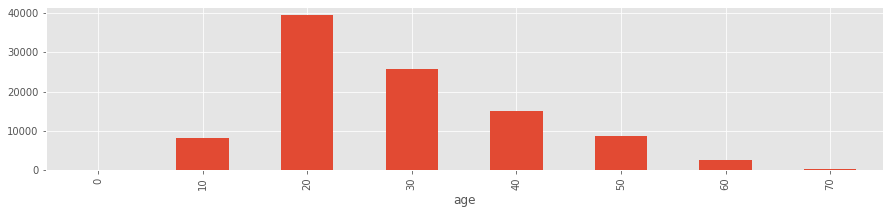

In [143]:
r.plot(kind="bar")

## Q4.4. A nap melyik órájában értékelnek a programozók, illetve a marketingesek? Ábrázold két tortadiagramon.

Tipp:

1. használd az értékelések táblából származó `timestamp` mezőt,
1. használhatsz két külön cellát a megoldáshoz,
1. gondold át hány szeletes lesz a tortadiagram.

Készíts egy függvényt, ami egy adott szakma képviselőinek óránkénti értékelésszámát adja vissza.

In [146]:
def occupation_cnt_by_hour(ratings, occupation):
    d= ratings[ratings.occupation==occupation].copy()
    d=d[['timestamp']]
    d['cnt']=1
    d['ora']=d['timestamp'].dt.hour
    gb=d.groupby('ora').sum()
    temp=pd.Series(gb.cnt)
    return (temp)

In [147]:
marketing = occupation_cnt_by_hour(ratings, "marketing")
assert type(marketing) == pd.Series

# 24 órás egy nap
assert len(marketing) < 25

###  Ábrázold tortadiagramon a marketingesek és a programozók értékelési óráit.

Először a marketingesek:

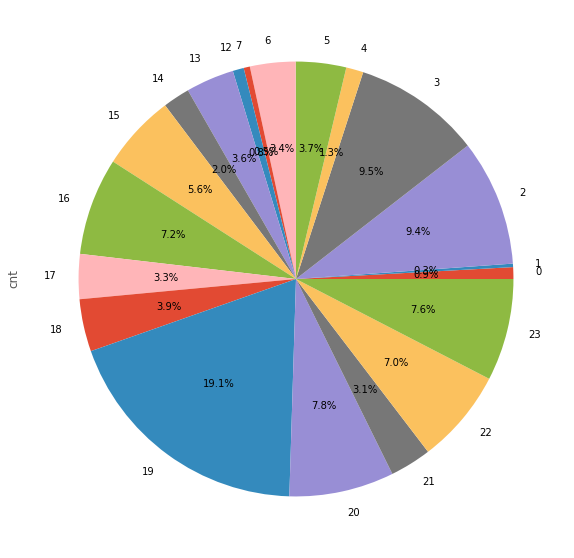

In [148]:
# YOUR CODE HERE
marketing.plot(y="value",figsize=(10,10),kind="pie",autopct="%.01f%%")

majd a programozók:

In [149]:
programmer = occupation_cnt_by_hour(ratings, "programmer")

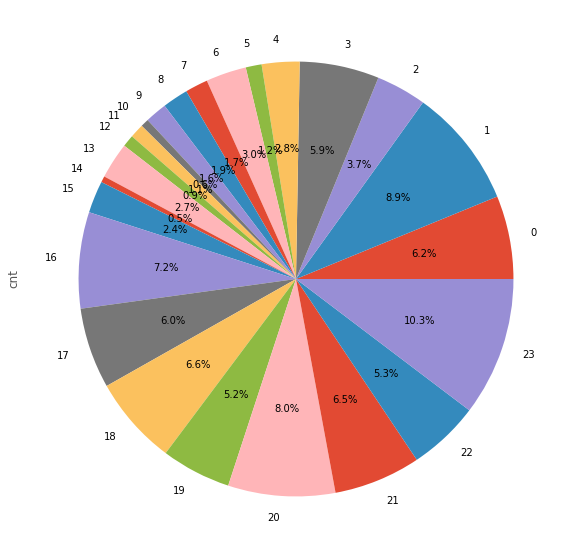

In [150]:
programmer.plot(y="value",figsize=(10,10),kind="pie",autopct="%.01f%%")

## Q4.5. Készíts hisztogramot az értékelési kedvről! Hány user adott le N értékelést?

Segítség:

- Az adatból hiányoznak a 20 értékelésnél kevesebbet leadó felhasználók, ami a hisztogramról könnyen leolvasható, ha jól ábrázoltad.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Q4.6. Milyen volt a nemek eloszlása a romantikus filmet, illetve az akciófilmeket értékelők között? Készíts két tortadiagramot!

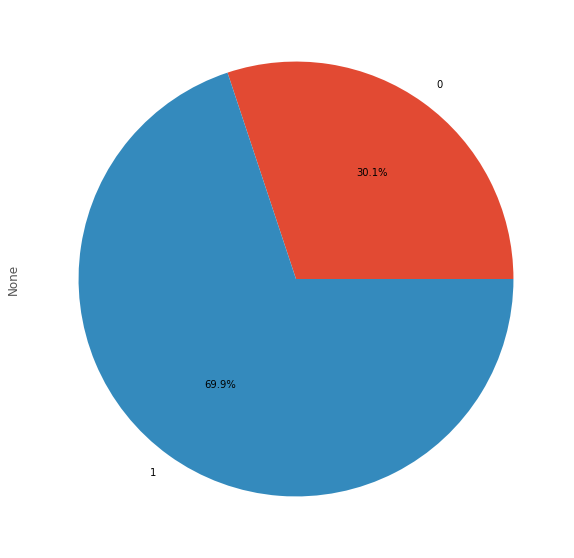

In [153]:
women=ratings[(ratings.romance==1) & (ratings.gender=="F")].copy()
cntf=len(women)
men=ratings[(ratings.romance==1) & (ratings.gender=="M")].copy()
cntm=len(men)
temp=pd.Series([cntf,cntm])
temp.plot(y="value",figsize=(10,10),kind="pie",autopct="%.01f%%")

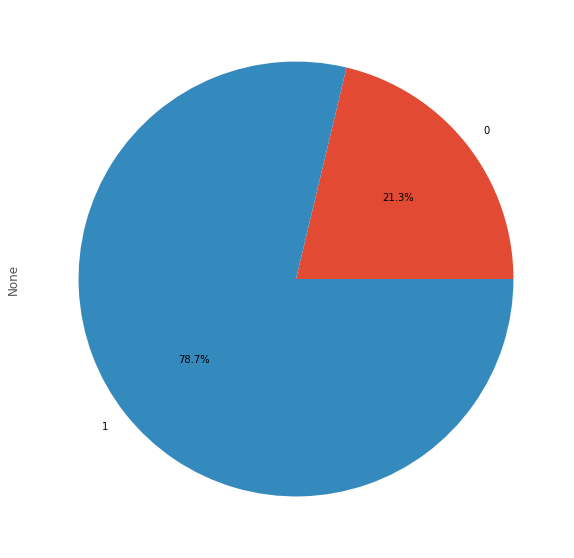

In [154]:
women=ratings[(ratings.action==1) & (ratings.gender=="F")].copy()
cntf=len(women)
men=ratings[(ratings.action==1) & (ratings.gender=="M")].copy()
cntm=len(men)
temp=pd.Series([cntf,cntm])
temp.plot(y="value",figsize=(10,10),kind="pie",autopct="%.01f%%")

## Q4.7. Jóval több férfi adott le értékelést. Hogy alakulnak ezek az arányok, ha normálunk az összes értékelésre jellemző nemek arányával?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Q4.8. A nap melyik órájában melyik szakma értékel legtöbbször és hányszor értékelnek?

Példa válasz:

* 0-1 óra között a mérnökök értékelnek legtöbbször, 2134-szer.
* 1-2 óra között az oktatók (educator) értékelnek legtöbbször, 1879-szer.

Táblázatos formában elég megválaszolni.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()